In [1]:
import numpy as np
import pandas as pd
import math
import random
from random import randint

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
blueCells = 0.45 #Процентное соотношение синих к общему числу
redCells = 0.45 #Процентное соотношение красных к общему числу
whiteCells = 0.10 #Процентное соотношение белых (пустых) к общему числу
sizeOfBlue = 0 #Количество синих клеток в зависимости от условия
sizeOfRed = 0 #Количество красных клеток в зависимости от условия
sizeOfWhite = 0 #Количество белых (пустых) клеток в зависимости от условия
sizeOfMatrix = 7 #7*7
agents = {1: 1, 2: 2, 3: 3} #1 - blue; 2 - red; 3 - white;

maxValueBlue = round((sizeOfMatrix ** 2) * blueCells) #Вычисление максимального количества синих клеток 
maxValueRed = round((sizeOfMatrix ** 2) * redCells) #Вычисление максимального количества красных клеток 
maxValueWhite = round((sizeOfMatrix ** 2) * whiteCells) #Вычисление максимального количества пустых клеток 

frameNotHapinessNeighbourhood = pd.DataFrame(columns=['address_i', 'address_j'])
frameEmptyCells = pd.DataFrame(columns=['address_i', 'address_j'])

data = [] #Массив клеток
for i in range(sizeOfMatrix): #Заполнение его пустыми элементами
    data.append([0]*sizeOfMatrix)

In [4]:
for i in range(sizeOfMatrix): #Рандомно заполняем сетку в заисимости от условия
  for j in range(sizeOfMatrix):
    successOfCell = False

    while successOfCell != True:
      randomValue = randint(1,3)
      if randomValue == 1 and sizeOfBlue < maxValueBlue:
        data[i][j] = agents[1] #blue 
        sizeOfBlue = sizeOfBlue + 1
        successOfCell = True
      if randomValue == 2 and sizeOfRed < maxValueRed:
        data[i][j] = agents[2] #red
        sizeOfRed = sizeOfRed + 1
        successOfCell = True
      if randomValue == 3 and sizeOfWhite < maxValueWhite:
        data[i][j] = agents[3] #white
        sizeOfWhite = sizeOfWhite + 1
        successOfCell = True
      if sizeOfBlue == maxValueBlue & sizeOfRed == maxValueRed & sizeOfWhite == maxValueWhite:
        successOfCell = True

In [5]:
def Iterations(data, sizeOfMatrix, frameEmptyCells, frameNotHapinessNeighbourhood): #Функция определения несчатливых клеток
  frameEmptyCells = frameEmptyCells.iloc[0:0]
  frameNotHapinessNeighbourhood = frameNotHapinessNeighbourhood.iloc[0:0]
  for i in range(sizeOfMatrix):
    for j in range(sizeOfMatrix):
      countOfHappyNeighbors = 0
      if i == 0 and j == 0: #В случае если клетка в крайне левом верхнем положении
        if data[i][j] == data[i][j + 1]: 
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == sizeOfMatrix - 1 and j == 0: #В случае если клетка в крайне левом нижнем положении
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == 0 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом верхнем положении
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == sizeOfMatrix - 1 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом нижнем положении
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
    

      elif i - 1 < 0: #Условие если заднная клетка находится на крайне верхней грани 
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      elif j - 1 < 0: #Условие если заднная клетка находится на крайне левой грани 
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      elif j + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне правой грани 
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
 
      elif i + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне нижней грани 
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      else: #Условие если заднная клетка имеет соседей со всех сторон
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      if data[i][j] == agents[3]:
        frameEmptyCells = frameEmptyCells.append({'address_i': i, 'address_j': j}, ignore_index=True)

      if countOfHappyNeighbors < 2:
        if data[i][j] == agents[3]:
          continue
        frameNotHapinessNeighbourhood = frameNotHapinessNeighbourhood.append({'address_i': i, 'address_j': j}, ignore_index=True)

  return (frameNotHapinessNeighbourhood, frameEmptyCells)

In [6]:
def ChangeData(data, frameNotHapinessNeighbourhood, frameEmptyCells): #Функция перестановки 
  while not frameNotHapinessNeighbourhood.empty:
    tempEmptyCells = frameEmptyCells.sample()
    frameEmptyCells.drop(labels = tempEmptyCells.index, axis = 0, inplace = True)

    tempNotHappinessCells = frameNotHapinessNeighbourhood.sample()
    frameNotHapinessNeighbourhood.drop(labels = tempNotHappinessCells.index, axis = 0, inplace = True)
  
    data[int(tempEmptyCells.address_i)][int(tempEmptyCells.address_j)] = data[int(tempNotHappinessCells.address_i)][int(tempNotHappinessCells.address_j)]
    data[int(tempNotHappinessCells.address_i)][int(tempNotHappinessCells.address_j)] = agents[3]
    frameEmptyCells = frameEmptyCells.append({'address_i': int(tempNotHappinessCells.address_i), 'address_j': int(tempNotHappinessCells.address_j)}, ignore_index=True)

  return data

In [12]:
def СonversionСolorScheme(sizeOfMatrix, data): #Преобразование data в сетку из 3 элементов
  A1 = np.zeros((sizeOfMatrix, sizeOfMatrix))
  A2 = np.zeros((sizeOfMatrix, sizeOfMatrix))

  A1[A1==0] = None
  A2[A2==0] = None

  pwargs = {'interpolation':'nearest'}
  for i in range(sizeOfMatrix):
    for j in range(sizeOfMatrix):
      if data[i][j] == agents[1]:
        A1[i,j] = 1
        plt.imshow(A1,cmap=plt.cm.jet,**pwargs)
      if data[i][j] == agents[2]:
        A2[i,j] = 1
        plt.imshow(A2,cmap=plt.cm.hsv,**pwargs)
    
  plt.show()

In [8]:
def IterationsSegregation(sizeOfIterations, data, frameNotHapinessNeighbourhood, frameEmptyCells, sizeOfMatrix): #Вывод клеток за заданное число шагов
  for i in range(sizeOfIterations):
    СonversionСolorScheme(sizeOfMatrix, data)
    frameNotHapinessNeighbourhood, frameEmptyCells  = Iterations(data, sizeOfMatrix, frameEmptyCells, frameNotHapinessNeighbourhood)
    data = ChangeData(data, frameNotHapinessNeighbourhood, frameEmptyCells)

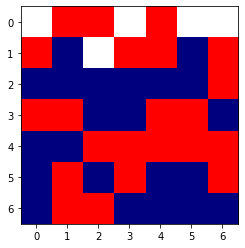

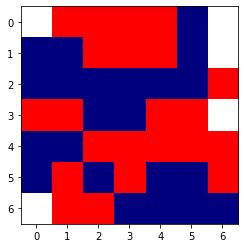

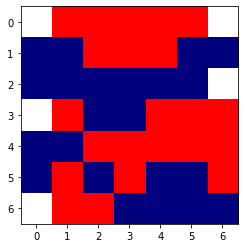

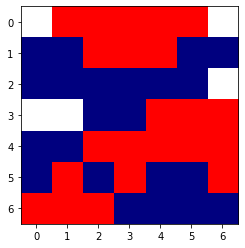

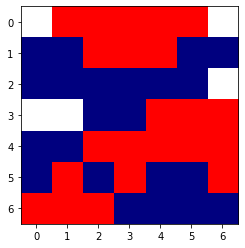

In [14]:
IterationsSegregation(5, data, frameNotHapinessNeighbourhood, frameEmptyCells, sizeOfMatrix)

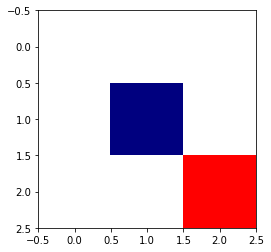

In [ ]:
A1 = np.zeros((3,3))
A2 = np.zeros((3,3))
A1[1,1] = 1
A2[2,2] = 1

# Apply a mask to filter out unused values
A1[A1==0] = None
A2[A2==0] = None

# Use different colormaps for each layer
pwargs = {'interpolation':'nearest'}
plt.imshow(A1,cmap=plt.cm.jet,**pwargs)
plt.imshow(A2,cmap=plt.cm.hsv,**pwargs)
plt.show()

In [ ]:
data = ChangeData(data, frameNotHapinessNeighbourhood, frameEmptyCells)

In [ ]:
frameNotHapinessNeighbourhood

,address_i,address_j


In [ ]:
frameEmptyCells 

,address_i,address_j
1,1,0
2,1,1
3,1,3
4,2,0


In [ ]:
data

[[3, 3, 1, 3, 1, 1, 1],
 [2, 1, 2, 2, 1, 1, 1],
 [1, 2, 1, 1, 2, 1, 1],
 [1, 1, 1, 2, 1, 1, 3],
 [3, 1, 2, 1, 1, 1, 2],
 [2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2]]

In [ ]:
data1 = data
data1

[[3, 3, 1, 3, 1, 1, 1],
 [2, 1, 2, 2, 1, 1, 1],
 [1, 2, 1, 1, 2, 1, 1],
 [1, 1, 1, 2, 1, 1, 3],
 [3, 1, 2, 1, 1, 1, 2],
 [2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2]]

In [ ]:
#frameHappinessNeighbourhood = pd.DataFrame(columns=['address i', 'address j', 'countOfNeighbors'])
frameNotHapinessNeighbourhood = pd.DataFrame(columns=['address_i', 'address_j'])
frameEmptyCells = pd.DataFrame(columns=['address_i', 'address_j'])

for i in range(sizeOfMatrix):
  for j in range(sizeOfMatrix):
    countOfHappyNeighbors = 0
    if i == 0 and j == 0: #В случае если клетка в крайне левом верхнем положении
      if data[i][j] == data[i][j + 1]: 
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
    elif i == sizeOfMatrix - 1 and j == 0: #В случае если клетка в крайне левом нижнем положении
      if data[i][j] == data[i - 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
    elif i == 0 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом верхнем положении
      if data[i][j] == data[i][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
    elif i == sizeOfMatrix - 1 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом нижнем положении
      if data[i][j] == data[i][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
    

    elif i - 1 < 0: #Условие если заднная клетка находится на крайне верхней грани 
      if data[i][j] == data[i][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1

    elif j - 1 < 0: #Условие если заднная клетка находится на крайне левой грани 
      if data[i][j] == data[i - 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1

    elif j + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне правой грани 
      if data[i][j] == data[i - 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
 
    elif i + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне нижней грани 
      if data[i][j] == data[i][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1

    else: #Условие если заднная клетка имеет соседей со всех сторон
      if data[i][j] == data[i - 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i - 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j + 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i + 1][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1
      if data[i][j] == data[i][j - 1]:
        countOfHappyNeighbors = countOfHappyNeighbors + 1

    if data[i][j] == 3:
      frameEmptyCells = frameEmptyCells.append({'address_i': i, 'address_j': j}, ignore_index=True)

    if countOfHappyNeighbors < 2:
      if data[i][j] == 3:
        continue
      frameNotHapinessNeighbourhood = frameNotHapinessNeighbourhood.append({'address_i': i, 'address_j': j}, ignore_index=True)

In [ ]:
frameNotHapinessNeighbourhood

,address_i,address_j
0,0,0
1,0,1
2,0,3
3,0,4
4,0,5
5,1,6
6,2,2
7,6,1


In [ ]:
frameEmptyCells

,address_i,address_j
0,0,2
1,0,6
2,1,1
3,1,2
4,1,3


In [ ]:
a = frameEmptyCells.sample()
print(a.address_i)
print(a.address_j)
print(a.index)

3    1
Name: address_i, dtype: object
3    5
Name: address_j, dtype: object
Int64Index([3], dtype='int64')


In [ ]:
while not frameNotHapinessNeighbourhood.empty:
  tempEmptyCells = frameEmptyCells.sample()
  frameEmptyCells.drop(labels = tempEmptyCells.index, axis = 0, inplace = True)

  tempNotHappinessCells = frameNotHapinessNeighbourhood.sample()
  frameNotHapinessNeighbourhood.drop(labels = tempNotHappinessCells.index, axis = 0, inplace = True)
  
  data[int(tempEmptyCells.address_i)][int(tempEmptyCells.address_j)] = data[int(tempNotHappinessCells.address_i)][int(tempNotHappinessCells.address_j)]
  data[int(tempNotHappinessCells.address_i)][int(tempNotHappinessCells.address_j)] = 3
  frameEmptyCells = frameEmptyCells.append({'address_i': int(tempNotHappinessCells.address_i), 'address_j': int(tempNotHappinessCells.address_j)}, ignore_index=True)

In [ ]:
data

[[2, 3, 1, 3, 2, 3, 1],
 [1, 1, 2, 3, 2, 2, 3],
 [1, 2, 1, 2, 2, 1, 1],
 [2, 1, 2, 2, 1, 1, 2],
 [1, 2, 1, 1, 2, 2, 2],
 [1, 1, 1, 2, 1, 2, 1],
 [1, 2, 2, 2, 2, 1, 1]]

In [ ]:
def Iterations(data, sizeOfMatrix, frameEmptyCells, frameNotHapinessNeighbourhood):
  frameEmptyCells = frameEmptyCells.iloc[0:0]
  frameNotHapinessNeighbourhood = frameNotHapinessNeighbourhood.iloc[0:0]
  for i in range(sizeOfMatrix):
    for j in range(sizeOfMatrix):
      countOfHappyNeighbors = 0
      if i == 0 and j == 0: #В случае если клетка в крайне левом верхнем положении
        if data[i][j] == data[i][j + 1]: 
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == sizeOfMatrix - 1 and j == 0: #В случае если клетка в крайне левом нижнем положении
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == 0 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом верхнем положении
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == sizeOfMatrix - 1 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом нижнем положении
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
    

      elif i - 1 < 0: #Условие если заднная клетка находится на крайне верхней грани 
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      elif j - 1 < 0: #Условие если заднная клетка находится на крайне левой грани 
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      elif j + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне правой грани 
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
 
      elif i + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне нижней грани 
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      else: #Условие если заднная клетка имеет соседей со всех сторон
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      if data[i][j] == 3:
        frameEmptyCells = frameEmptyCells.append({'address_i': i, 'address_j': j}, ignore_index=True)

      if countOfHappyNeighbors < 2:
        if data[i][j] == 3:
          continue
        frameNotHapinessNeighbourhood = frameNotHapinessNeighbourhood.append({'address_i': i, 'address_j': j}, ignore_index=True)

  return (frameNotHapinessNeighbourhood, frameEmptyCells)

In [ ]:
frameNotHapinessNeighbourhood, frameEmptyCells  = Iterations(data, sizeOfMatrix, frameEmptyCells, frameNotHapinessNeighbourhood)


In [ ]:
frameEmptyCells 

,address_i,address_j
0,0,2
1,0,5
2,0,6
3,6,1
4,0,1


In [ ]:
frameNotHapinessNeighbourhood

,address_i,address_j


In [ ]:
frameNotHapinessNeighbourhood, frameEmptyCells  = Iterations(data, sizeOfMatrix, frameEmptyCells, frameNotHapinessNeighbourhood)

In [ ]:
frameEmptyCells 

,address_i,address_j
0,0,1
1,0,3
2,0,5
3,1,3
4,1,6


In [ ]:
frameNotHapinessNeighbourhood

,address_i,address_j
0,0,0
1,0,2
2,0,6
3,6,1


In [ ]:
result = frameEmptyCells.iloc[tempEmptyCells.index]
frameEmptyCells

,address_i,address_j
0,0,0
1,0,1
3,0,4
4,0,6


ValueError: ignored

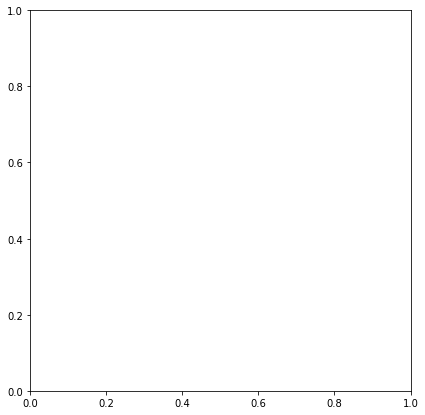

In [ ]:
plt.figure(figsize=(sizeOfMatrix,sizeOfMatrix))
#plt.imshow(data)
plt.imshow(data)


In [ ]:
colors = 'lime red blue magenta yellow'.split()
cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

plt.imshow(data, cmap=cmap)
plt.show()

NameError: ignored